<a href="https://colab.research.google.com/github/ymiftah/operations_research/blob/master/lpQueens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# If you are running the code on google colab or a unix machine you can install
# pyomo and the cbc solver through the following lines
# If you are running on windows the cbc executable can be found on the ampl
# website https://ampl.com/products/solvers/open-source/
!pip install -qq pyomo
!apt-get install -qq coinor-cbc

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

# The 8 Queens problem

## Problem Statement

8 Queens can be positioned on a chess board such as no queen is under threat of another.

We will generalize this problem by the following: Given a board of size n x n, what is the maximum number of queens we can place on the board such as no queen is under threat of another.

Obviously we can at most place n queens, and in the case of a standard 8x8 board the number of Queens we can place is 8.

**Formulate the problem as a LP problem**

In [0]:
# Side Size of the board
N = 8

positions =  [str(i) + '-' + str(j)
              for i in range(1,N+1)
              for j in range(1,N+1)]
columns = [[str(i) + '-' + str(j)
              for i in range(1,N+1)]
              for j in range(1,N+1)]
rows = [[str(i) + '-' + str(j)
              for j in range(1,N+1)]
              for i in range(1,N+1)]
matrix= np.array(positions).reshape(N,N)
diagonals = [list(matrix.diagonal(i)) for i in range(-N+1,N)]
matrix = np.fliplr(matrix)
antidiag = [list(matrix.diagonal(i)) for i in range(-N+1,N)]

In [0]:
from pyomo.environ import *

# create a model
model = ConcreteModel()

# Sets
model.board = Set(initialize=positions)

# declare decision variables
model.queens = Var(model.board, domain=Binary)

# declare objective
model.obj = Objective(expr = sum(model.queens[p] for p in model.board),
                      sense=maximize)

#declare constraints
# def cstr_queens(m):
#     # There are 8 queens in total
#     return (sum(m.queens[p] for p in m.board) == 8)
# model.cstr_queens = Constraint(rule=cstr_queens)

i=0
for l in [rows, columns, diagonals, antidiag]:
    for pos in l:
        i+=1
        def cstr_rows(m):
            return (sum(m.queens[p] for p in m.board if p in pos) <= 1)
        setattr(model, 'cstr_%d'%i, Constraint(rule=cstr_rows))

In [5]:
# Solve the problem
res = SolverFactory('cbc', executable='/usr/bin/cbc').solve(model)
print(res['Solver'])


- Status: ok
  User time: -1.0
  System time: 0.01
  Wallclock time: 0.02
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
    Black box: 
      Number of iterations: 0
  Error rc: 0
  Time: 0.033240556716918945



## Results

We can position a maximum of 8 queens on an 8x8 board

In [6]:
model.obj.display()

obj : Size=1, Index=None, Active=True
    Key  : Active : Value
    None :   True :   8.0


Let us visualize in a table the queens positions

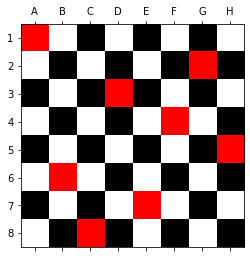

In [7]:
assignment = model.queens.extract_values()
A = np.array(list(assignment.values())).reshape(N,N)

# Make a N+1,N+1 grid...
import matplotlib.colors as colors

cmap = colors.ListedColormap(['white', 'black', 'red'])

nrows, ncols = N, N
image = np.zeros((nrows+1)**2)
# Set every other cell to a random number (this would be your data)
image[::2] = 1
# Reshape things into a N+1,N+1 grid and extract the 8x8 grid
image = image.reshape((nrows+1, ncols+1))
image = image[:N,:N]
# Set the queens position to the color red
image[A==1] = 2

row_labels = range(1,1+nrows)
col_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
plt.matshow(image, cmap=cmap)

plt.xticks(range(ncols), col_labels)
plt.yticks(range(nrows), row_labels)
plt.show()

## Remark

Obviously the solution is not unique and finding all possible combination is a more ambitious problem.